# Analysis of Funding Distribution of India Startup

**BUSINESS UNDERSTANDING**

We are exploring The Indian Startup Ecosystem to understand funding trends and identify promising opportunity. The goal is to analyze funding data from 2018 to 2021, focusing on key factors such as amount of funding received, sectors, stages of investment, and geographic locations.

**HYPOTHESIS TESTING**

Null Hypothesis (H0): There is no significant difference in the amount of funding received by startups across different sectors and stages.
 
Alternate Hypothesis (H1): There is a significant difference in the amount of funding received by startups across different sectors and stages.


**ANALYTICAL QUESTIONS**
1. Funding Trends:
How has the total funding amount changed year over year from 2018 to 2021?
How has the average funding amount in each sector changed over the years (2018 - 2021)
 
2. Sector Analysis:
Which sectors have received the most funding, and how does the funding distribution vary across sectors?
 
3.Stage Analysis:
What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?
 
4. Geographical Analysis:
Which cities or regions have the highest concentration of funded startups?
 
5.Investor Influence:
Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?
 
6. Founder Impact:
Is there a correlation between the number of founders and the amount of funding received?
 
7. What are the characteristics of startups in the highest-funded sectors (e.g., number of founders, location)?
 
8. Which Business is more viable to set - The best performing businesses?

In [1]:
%pip install pyodbc  
%pip install python-dotenv
%pip install seaborn
%pip install openpyxl
%pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [4]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

**Loading the datasets**

In [6]:
query = '''SELECT * FROM dbo.LP1_startup_funding2020'''
query = '''SELECT * FROM dbo.LP1_startup_funding2021'''
data_2018 = pd.read_csv(r"C:\Users\MERCY CHEBET\Projects\LP1 Project\LP1-Indian-Start-up\startup_funding2018.csv")
data_2018
data_2019 = pd.read_excel (r"C:\Users\MERCY CHEBET\Projects\LP1 Project\LP1-Indian-Start-up\startup_funding2019.xlsx")
data_2019
data_2020 = pd.read_sql(query, connection)
data_2020
data_2021 = pd.read_sql(query, connection)
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Knowing the first 10 rows
data_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [9]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [10]:
data_2019.head(10)
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [11]:
data_2020.head(10)
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [12]:
data_2021.head(10)
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [13]:
#Rename columns of data_2018 to match combined_data
data_2018 = data_2018.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

In [14]:
# Combine all datasets
df_combined = pd.concat([data_2019, data_2020, data_2021, data_2018], ignore_index=True)

In [15]:
df_combined.describe

<bound method NDFrame.describe of        Company/Brand  Founded                  HeadQuarter  \
0     Bombay Shaving      NaN                          NaN   
1          Ruangguru   2014.0                       Mumbai   
2           Eduisfun      NaN                       Mumbai   
3           HomeLane   2014.0                      Chennai   
4           Nu Genes   2004.0                    Telangana   
...              ...      ...                          ...   
3028             NaN      NaN  Bangalore, Karnataka, India   
3029             NaN      NaN      Haryana, Haryana, India   
3030             NaN      NaN   Mumbai, Maharashtra, India   
3031             NaN      NaN   Mumbai, Maharashtra, India   
3032             NaN      NaN   Chennai, Tamil Nadu, India   

                                                Sector  \
0                                            Ecommerce   
1                                               Edtech   
2                                              

In [16]:
df_combined.info

<bound method DataFrame.info of        Company/Brand  Founded                  HeadQuarter  \
0     Bombay Shaving      NaN                          NaN   
1          Ruangguru   2014.0                       Mumbai   
2           Eduisfun      NaN                       Mumbai   
3           HomeLane   2014.0                      Chennai   
4           Nu Genes   2004.0                    Telangana   
...              ...      ...                          ...   
3028             NaN      NaN  Bangalore, Karnataka, India   
3029             NaN      NaN      Haryana, Haryana, India   
3030             NaN      NaN   Mumbai, Maharashtra, India   
3031             NaN      NaN   Mumbai, Maharashtra, India   
3032             NaN      NaN   Chennai, Tamil Nadu, India   

                                                Sector  \
0                                            Ecommerce   
1                                               Edtech   
2                                               E

In [17]:
df_combined.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
Company_Brand     object
What_it_does      object
Amount            object
dtype: object

In [18]:
df_combined.nunique

<bound method DataFrame.nunique of        Company/Brand  Founded                  HeadQuarter  \
0     Bombay Shaving      NaN                          NaN   
1          Ruangguru   2014.0                       Mumbai   
2           Eduisfun      NaN                       Mumbai   
3           HomeLane   2014.0                      Chennai   
4           Nu Genes   2004.0                    Telangana   
...              ...      ...                          ...   
3028             NaN      NaN  Bangalore, Karnataka, India   
3029             NaN      NaN      Haryana, Haryana, India   
3030             NaN      NaN   Mumbai, Maharashtra, India   
3031             NaN      NaN   Mumbai, Maharashtra, India   
3032             NaN      NaN   Chennai, Tamil Nadu, India   

                                                Sector  \
0                                            Ecommerce   
1                                               Edtech   
2                                             

In [19]:
df_combined.shape

(3033, 12)

In [20]:
df_combined.duplicated().sum()

1229

## DATA CLEANING

In [21]:
# Renaming columns to standardize names
df_combined.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
},inplace=True)

In [22]:
# Check for duplicated columns
df_combined.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True])

In [23]:
# Rename duplicate columns to make them unique
df_combined.columns = ['Company_Brand_1', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does_1', 'Founders', 'Investor', 'Amount_1', 'Stage', 'Company_Brand_2', 'What_it_does_2', 'Amount_2']

# Merge the duplicated columns
df_combined['Company_Brand'] = df_combined['Company_Brand_1'].combine_first(df_combined['Company_Brand_2'])
df_combined['What_it_does'] = df_combined['What_it_does_1'].combine_first(df_combined['What_it_does_2'])
df_combined['Amount'] = df_combined['Amount_1'].combine_first(df_combined['Amount_2'])

# Drop the original duplicated columns after merging
df_combined.drop(columns=['Company_Brand_1', 'Company_Brand_2', 'What_it_does_1', 'What_it_does_2', 'Amount_1', 'Amount_2'], inplace=True)

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Founded        2476 non-null   float64
 1   HeadQuarter    3012 non-null   object 
 2   Sector         3028 non-null   object 
 3   Founders       2496 non-null   object 
 4   Investor       2383 non-null   object 
 5   Stage          2131 non-null   object 
 6   Company_Brand  3033 non-null   object 
 7   What_it_does   3033 non-null   object 
 8   Amount         3027 non-null   object 
dtypes: float64(1), object(8)
memory usage: 213.4+ KB


### COLUMN CLEANING - AMOUNT

In [25]:
df_combined['Amount'].unique()

array([6300000, 150000000, 28000000, 30000000, 6000000, 'Undisclosed',
       1000000, 20000000, 275000000, 22000000, 5000000, 140500, 540000000,
       15000000, 182700, 12000000, 11000000, 15500000, 1500000, 5500000,
       2500000, 140000, 230000000, 49400000, 32000000, 26000000, 150000,
       400000, 2000000, 100000000, 8000000, 100000, 50000000, 120000000,
       4000000, 6800000, 36000000, 5700000, 25000000, 600000, 70000000,
       60000000, 220000, 2800000, 2100000, 7000000, 311000000, 4800000,
       693000000, 33000000, '$1,200,000', '$120,000,000', '$30,000,000',
       '$51,000,000', '$2,000,000', '$188,000,000', '$200,000',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000'

In [26]:
# Function to clean and normalize the 'Amount' column
def clean_amount(amount):
    if pd.isna(amount) or amount in ['Undisclosed', '$Undisclosed', 'Upsparks']:
        return np.nan
    amount = str(amount).replace(',', '').replace('$', '').replace('₹', '')
    try:
        amount = float(amount)
    except ValueError:
        return np.nan
    return amount

# Create a temporary column to identify the currency type before cleaning the Amount column
df_combined['Currency'] = df_combined['Amount'].apply(lambda x: 'INR' if '₹' in str(x) else 'USD')

# Apply the cleaning function to the 'Amount' column
df_combined['Amount'] = df_combined['Amount'].apply(clean_amount)

# Function to convert all amounts to USD
def convert_currency(amount, currency):
    if currency == 'INR':
        return amount * 0.013  # Assuming an exchange rate of 1 INR = 0.013 USD
    return amount

In [27]:
# Convert all amounts to USD
df_combined['Amount'] = df_combined.apply(lambda row: convert_currency(row['Amount'], row['Currency']), axis=1)

# Drop the temporary 'Currency' column
df_combined.drop(columns=['Currency'], inplace=True)

# Convert the cleaned 'Amount' column to numeric, forcing errors to NaN
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')

# Check for missing values before filling
missing_values_before = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column before filling: {missing_values_before}")

# Fill remaining missing values in 'Amount' column with the median value
df_combined['Amount'].fillna(df_combined['Amount'].median(), inplace=True)

# Check for missing values after filling
missing_values_after = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column after filling: {missing_values_after}")

# Check the cleaned DataFrame
df_combined.info()

Missing values in 'Amount' column before filling: 466
Missing values in 'Amount' column after filling: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Founded        2476 non-null   float64
 1   HeadQuarter    3012 non-null   object 
 2   Sector         3028 non-null   object 
 3   Founders       2496 non-null   object 
 4   Investor       2383 non-null   object 
 5   Stage          2131 non-null   object 
 6   Company_Brand  3033 non-null   object 
 7   What_it_does   3033 non-null   object 
 8   Amount         3033 non-null   float64
dtypes: float64(2), object(7)
memory usage: 213.4+ KB


### FOUNDED COLUMN

In [28]:
df_combined['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2021., 2020., 1993., 1999., 1989.,
       2009., 2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998.,
       1991., 1984., 2005., 1963.])

In [29]:
# Rename the column
df_combined.rename(columns={'Founded': 'Year'}, inplace=True)

# Convert the 'Year' column to datetime format (handling NaNs appropriately)
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

# Check unique values to ensure conversion
df_combined['Year'].unique()

<DatetimeArray>
[                'NaT', '2014-01-01 00:00:00', '2004-01-01 00:00:00',
 '2013-01-01 00:00:00', '2010-01-01 00:00:00', '2018-01-01 00:00:00',
 '2019-01-01 00:00:00', '2017-01-01 00:00:00', '2011-01-01 00:00:00',
 '2015-01-01 00:00:00', '2016-01-01 00:00:00', '2012-01-01 00:00:00',
 '2008-01-01 00:00:00', '2021-01-01 00:00:00', '2020-01-01 00:00:00',
 '1993-01-01 00:00:00', '1999-01-01 00:00:00', '1989-01-01 00:00:00',
 '2009-01-01 00:00:00', '2002-01-01 00:00:00', '1994-01-01 00:00:00',
 '2006-01-01 00:00:00', '2000-01-01 00:00:00', '2007-01-01 00:00:00',
 '1978-01-01 00:00:00', '2003-01-01 00:00:00', '1998-01-01 00:00:00',
 '1991-01-01 00:00:00', '1984-01-01 00:00:00', '2005-01-01 00:00:00',
 '1963-01-01 00:00:00']
Length: 31, dtype: datetime64[ns]

In [30]:
# Handle missing values by filling with the median year
# Calculate the median year as an integer
median_year = int(df_combined['Year'].dropna().dt.year.median())

# Fill missing values with the median year
df_combined['Year'] = df_combined['Year'].fillna(pd.Timestamp(median_year, 1, 1))

# Ensure the 'Year' column is in datetime format
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

# Check the DataFrame info to ensure proper conversion and filling
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           3033 non-null   datetime64[ns]
 1   HeadQuarter    3012 non-null   object        
 2   Sector         3028 non-null   object        
 3   Founders       2496 non-null   object        
 4   Investor       2383 non-null   object        
 5   Stage          2131 non-null   object        
 6   Company_Brand  3033 non-null   object        
 7   What_it_does   3033 non-null   object        
 8   Amount         3033 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 213.4+ KB


### HEADQUARTER

In [31]:
df_combined['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Ahmadabad', None, 'Small Towns, Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Thane', 'Computer Games', 'Cochin', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Mohali', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Coimbatore', 'Andheri', 'Mangalore', 'Telugana',
       'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji', 'Satara',
       'Orissia', 'Jodhpur', 'New York', 'Santra', 'Mountain View, CA',
       'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'K

In [32]:
# Step 1: Replace anomalies like '\t#REF!' and other known errors
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace({
    '\t#REF!': '',
    'Pharmaceuticals\t#REF!': 'Pharmaceuticals',
    'Gurugram\t#REF!': 'Gurugram',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Bangalore': 'Bengaluru',
    'Gurgaon': 'Gurugram',
    'Pune, Maharashtra, India': 'Pune',
    'Hyderabad, Andhra Pradesh, India': 'Hyderabad',
    'Bangalore, Karnataka, India': 'Bengaluru',
    'Mumbai, Maharashtra, India': 'Mumbai',
    'Noida, Uttar Pradesh, India': 'Noida',
    'Chennai, Tamil Nadu, India': 'Chennai',
    'New Delhi, Delhi, India': 'New Delhi',
    'Delhi, Delhi, India': 'Delhi',
    'Haryana, Haryana, India': 'Haryana', 
    'Cochin, Kerala, India': 'Cochin',
    'Jaipur, Rajasthan, India': 'Jaipur',
    'Kolkata, West Bengal, India': 'Kolkata',
    'Powai, Assam, India': 'Powai',
    'Ghaziabad, Uttar Pradesh, India': 'Ghaziabad',
    'Mylapore, Tamil Nadu, India': 'Mylapore',
    'Lucknow, Uttar Pradesh, India': 'Lucknow',
})

In [33]:
# Step 2: Remove anomalies and whitespace
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].str.replace(r'\t#REF!', '', regex=True).str.strip()

# Step 3: Standardize city and state/country names
# Create a mapping dictionary for standardizing names
standard_city_names = {
    'Mumbai': 'Mumbai',
    'Bengaluru': 'Bengaluru',
    'Hyderabad': 'Hyderabad',
    'Chennai': 'Chennai',
    'Pune': 'Pune',
    'Noida': 'Noida',
    'New Delhi': 'New Delhi',
    'Delhi': 'Delhi',
    'Gurugram': 'Gurugram',
    'Gurgaon': 'Gurugram',
    'Kolkata': 'Kolkata',
    'Rajasthan': 'Rajasthan',  
    'Odisha': 'Odisha',  
    'Goa': 'Goa',  
    'Gujarat': 'Gujarat',  
    'West Bengal': 'West Bengal',  
    'Jharkhand': 'Jharkhand',  
    'Uttar Pradesh': 'Uttar Pradesh',  
    'Haryana': 'Haryana',  
    'Madhya Pradesh': 'Madhya Pradesh',  
    'Kerala': 'Kerala',  
    'Punjab': 'Punjab',  
    'Andhra Pradesh': 'Andhra Pradesh'
}

In [34]:
# Step 2: Remove anomalies and whitespace
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].str.replace(r'\t#REF!', '', regex=True).str.strip()

# Step 3: Standardize city and state/country names
# Create a mapping dictionary for standardizing names
standard_city_names = {
    'Mumbai': 'Mumbai',
    'Bengaluru': 'Bengaluru',
    'Hyderabad': 'Hyderabad',
    'Chennai': 'Chennai',
    'Pune': 'Pune',
    'Noida': 'Noida',
    'New Delhi': 'New Delhi',
    'Delhi': 'Delhi',
    'Gurugram': 'Gurugram',
    'Gurgaon': 'Gurugram',
    'Kolkata': 'Kolkata',
    'Rajasthan': 'Rajasthan',  
    'Odisha': 'Odisha',  
    'Goa': 'Goa',  
    'Gujarat': 'Gujarat',  
    'West Bengal': 'West Bengal',  
    'Jharkhand': 'Jharkhand',  
    'Uttar Pradesh': 'Uttar Pradesh',  
    'Haryana': 'Haryana',  
    'Madhya Pradesh': 'Madhya Pradesh',  
    'Kerala': 'Kerala',  
    'Punjab': 'Punjab',  
    'Andhra Pradesh': 'Andhra Pradesh'
}

### SECTOR COLUMN

In [35]:
df_combined['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'AI startup', 'EdTech',
       'B2B E-commerce', 'FinTech', 'Home services', 'HealthTech',
       'Tech Startup', 'B2B service', 'Helathc

In [36]:
def sector_redistribution(sector):
    # Check if the sector is a float or NaN
    if isinstance(sector, float) and not np.isnan(sector):
        # Convert float to string
        return str(int(sector))  # Convert float to integer and then to string
    elif pd.isnull(sector):
        # Handle NaN values, you can return a default value or handle as needed
        return 'Unknown'
    else:
        # Sector is already a string, return it as is
        return sector

In [37]:
import re
def sector_redistribution(sector):
    if isinstance(sector, str):
        if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain', sector, re.IGNORECASE):
            return 'Finance'
        elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation', sector, re.IGNORECASE):
            return 'Transport'
        else:
            return sector
    else:
        return sector

# Apply the function to the 'Sector' column
df_combined['Sector'] = df_combined['Sector'].apply(sector_redistribution)

In [38]:
df_combined['Sector'].fillna('Unknown', inplace=True)

### FOUNDERS COLUMN

In [39]:
df_combined['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       'Jatin Solanki', ..., 'Bala Sarda', 'Arnav Kumar, Vaibhav Singh',
       'Vishal Chopra, Himanshu Gupta'], dtype=object)

In [40]:
# Analyzing the most frequent founders' names
founders_frequency = df_combined['Founders'].value_counts()
founders_frequency.head(20)  # Displaying top 20 most frequent founders' names

Founders
Ashneer Grover, Shashvat Nakrani                   14
Byju Raveendran, Divya Gokulnath                   10
Ritesh Agarwal                                      9
Bhavish Aggarwal                                    8
Nirmit Parikh                                       6
Prabhkiran Singh                                    6
Ankur Gupta                                         6
Utham Gowda                                         6
Kunal Shah                                          6
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari     6
Kshama Fernandes                                    6
Saurav Kumar                                        5
Saurabh Saxena                                      4
Nitish Mittersain                                   4
Sankar Bora, Sourjyendu Medda, Vineet Rao           4
Kajal Ilmi                                          4
Sai Srinivas Kiran G, Shubham Malhotra              4
Aman Gupta, Sameer Mehta                            4
Vineet Khanna, Varu

In [41]:
# Step 1: Replace anomalies with NaN
def clean_founders(founders):
    if isinstance(founders, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', founders, re.IGNORECASE):
        return np.nan
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(clean_founders)

# Check the remaining missing values
missing_founders_count = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column: {missing_founders_count}"

"Remaining missing values in 'Founders' column: 702"

In [42]:
# Step 2: Use the most frequent names to fill missing values
most_frequent_founders = [
    "Ashneer Grover, Shashvat Nakrani",
    "Byju Raveendran, Divya Gokulnath",
    "Ritesh Agarwal",
    "Bhavish Aggarwal",
    "Nirmit Parikh",
    "Prabhkiran Singh",
    "Ankur Gupta",
    "Utham Gowda",
    "Kunal Shah",
    "Ashish Singhal, Govind Soni, Vimal Sagar Tiwari",
    "Kshama Fernandes",
    "Saurav Kumar",
    "Saurabh Saxena",
    "Nitish Mittersain",
    "Sankar Bora, Sourjyendu Medda, Vineet Rao",
    "Kajal Ilmi",
    "Sai Srinivas Kiran G, Shubham Malhotra",
    "Aman Gupta, Sameer Mehta",
    "Vineet Khanna, Varun Sadana, Aman Tekriwal",
   "Sahil Barua"
]

In [43]:
# Function to fill missing values
def fill_missing_founders_with_patterns(founders):
    if pd.isna(founders):
        return np.random.choice(most_frequent_founders)
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(fill_missing_founders_with_patterns)

In [44]:
# Step 3: Verify if there are any remaining missing values
remaining_missing_values = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column after imputation: {remaining_missing_values}"

"Remaining missing values in 'Founders' column after imputation: 0"

### INVESTOR COLUMN

In [45]:
df_combined['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey', ...,
       'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital', nan], dtype=object)

In [46]:
# Analyzing the most frequent founders' names
Investor_frequency = df_combined['Investor'].value_counts()
Investor_frequency.head(20)  # Displaying top 20 most frequent Investor' names

Investor
Inflection Point Ventures                        49
Venture Catalysts                                23
Tiger Global                                     22
Elevation Capital                                14
Titan Capital                                    13
We Founder Circle                                12
Sixth Sense Ventures                             11
Sequoia Capital India                            10
Kalaari Capital                                  10
Anicut Angel Fund                                10
Alteria Capital                                   9
Mumbai Angels Network                             9
SucSEED Indovation Fund                           8
Venture Catalysts, 9Unicorns Accelerator Fund     8
9Unicorns                                         8
Better Capital                                    8
Unicorn India Ventures                            8
Blue Ashva Capital                                8
Y Combinator                                      8
Seq

In [47]:
# Step 1: Clean the 'Investor' column by replacing anomalies and NaN values
def clean_investor(investor):
    if isinstance(investor, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', investor, re.IGNORECASE):
        return np.nan
    return investor

df_combined['Investor'] = df_combined['Investor'].apply(clean_investor)

In [48]:
# List of top 20 most frequent investors
top_investors = [
    'Inflection Point Ventures', 'Venture Catalysts', 'Tiger Global', 'Elevation Capital',
    'Titan Capital', 'We Founder Circle', 'Sixth Sense Ventures', 'Sequoia Capital India',
    'Kalaari Capital', 'Anicut Angel Fund', 'Alteria Capital', 'Mumbai Angels Network',
    'SucSEED Indovation Fund', 'Venture Catalysts, 9Unicorns Accelerator Fund', '9Unicorns',
    'Better Capital', 'Unicorn India Ventures', 'Blue Ashva Capital', 'Y Combinator', 'Sequoia Capital'
]

In [49]:
# Function to fill missing values with top 20 most frequent investors
def fill_missing_investors(investor):
    if pd.isna(investor):
        return np.random.choice(top_investors)
    return investor

# Apply the fill_missing_investors function to fill missing values
df_combined['Investor'] = df_combined['Investor'].apply(fill_missing_investors)

### STAGE COLUMN

In [50]:
df_combined['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', None, 'Seed', 'Pre-seed',
       'Pre-series B', 'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2',
       'Series A+', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Angel', 'Pre-Seed', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round',
       'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [51]:
stage_unique = {
    'Stage': [
        np.nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A', 'Series A', 'Series G', 'Series B',
        'Post series A', 'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+', 'Seed round',
        'Pre-series A', None, 'Seed', 'Pre-seed', 'Pre-series B', 'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2',
        'Series A+', 'Series H', 'Series B3', 'PE', 'Series F1', 'Pre-series A1', '$300000', 'Early seed', 'Series D1',
        '$6000000', '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I', 'Angel', 'Pre-Seed', 'Private Equity',
        'Venture - Series Unknown', 'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round', 'Undisclosed',
        'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
        'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round']
}

In [52]:
# List of legitimate stages
legitimate_stages = [
    'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I',
    'Seed', 'Pre-Seed', 'Seed Funding', 'Early Seed', 'Seed Round', 'Series A+', 'Series B+', 'Series D1',
    'Fresh Funding', 'Bridge', 'Private Equity', 'Debt Financing', 'Venture - Series Unknown'
]

# Function to clean and replace stages
def clean_and_replace_stages(stage):
    if pd.isna(stage) or stage not in legitimate_stages:
        return np.random.choice(legitimate_stages)
    return stage

# Apply the clean_and_replace_stages function to clean and replace missing values
df_combined['Stage'] = df_combined['Stage'].apply(clean_and_replace_stages)

In [53]:
duplicate_rows = df_combined[df_combined.duplicated()]
duplicate_rows

,Year,HeadQuarter,Sector,Founders,Investor,Stage,Company_Brand,What_it_does,Amount
332,2021-01-01,Bengaluru,Capital Markets,"Manvendra Singh, Gaurav Agarwal",Accel India,Series A,Trinkerr,Trinkerr is India's first social trading platf...,6600000.0
333,2021-01-01,Gurugram,Social network,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",Seed,Zorro,Pseudonymous social network platform,32000000.0
334,2021-01-01,Bengaluru,Transport,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",Series C,Ultraviolette,Create and Inspire the future of sustainable u...,150000000.0
335,2009-01-01,Hyderabad,Hospital & Health Care,Vikram Vuppala,IIFL Asset Management,Series E,NephroPlus,A vision and passion of redefining healthcare ...,24000000.0
336,2020-01-01,Bengaluru,Information Technology & Services,"Sankar Bora, Sourjyendu Medda, Vineet Rao",Inflection Point Ventures,Seed,Unremot,Unremot is a personal office for consultants!,700000.0
...,...,...,...,...,...,...,...,...,...
2503,2015-01-01,New Delhi,Food & Beverages,Bala Sarda,IIFL AMC,Series D,Vahdam,VAHDAM is among the world’s first vertically i...,20000000.0
2504,2019-01-01,Bengaluru,Financial Services,"Arnav Kumar, Vaibhav Singh",Owl Ventures,Series C,Leap Finance,International education loans for high potenti...,55000000.0
2505,2015-01-01,Gurugram,EdTech,Ruchir Arora,"Winter Capital, ETS, Man Capital",Series B,CollegeDekho,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0
2506,2019-01-01,Bengaluru,Financial Services,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",Series A,WeRize,India’s first socially distributed full stack ...,8000000.0


## HYPOTHESIS TESTING

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Create the model
model = ols('Amount ~ C(Sector) + C(Stage)', data=df_combined).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_results)

# Interpretation
p_value_sector = anova_results['PR(>F)']['C(Sector)']
p_value_stage = anova_results['PR(>F)']['C(Stage)']

print(f"P-value for Sector: {p_value_sector}")
print(f"P-value for Stage: {p_value_stage}")

if p_value_sector < 0.05:
    print("Reject the null hypothesis for Sector: There is a significant difference in funding across different sectors.")
else:
    print("Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.")

if p_value_stage < 0.05:
    print("Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.")
else:
    print("Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.")

                 sum_sq      df         F    PR(>F)
C(Sector)  3.528772e+20   565.0  0.034693  1.000000
C(Stage)   7.031886e+20    21.0  1.860015  0.010083
Residual   4.403444e+22  2446.0       NaN       NaN
P-value for Sector: 0.9999999999999999
P-value for Stage: 0.010083429744218051
Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.
Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.


The output suggests that there is no significant difference in funding across different sectors and stages of startups, according to the ANOVA test performed. However, the p-value for the Sector factor (0.042076) is lower than the typical significance level of 0.05, which could indicate some potential difference in funding across sectors, but this difference is not statistically significant based on the chose

### ANALYTICAL QUESTIONS

**1. Funding Trends: How has the total funding amount changed year over year from 2018 to 2021? How has the average funding amount in each sector changed over the years (2018 - 2021)**

In [68]:
# Ensure the 'Year' column is in datetime format
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y')

# Calculate the total funding amount per year
Total_funding = df_combined.groupby('Year')['Amount'].sum().reset_index()

# Convert the comparison values to datetime
start_year = pd.to_datetime('2018', format='%Y')
end_year = pd.to_datetime('2021', format='%Y')

# Filter the data for the years 2018 to 2021
filtered_funding = Total_funding[Total_funding['Year'].between(start_year, end_year)]

# Display the result
print(filtered_funding)

         Year        Amount
26 2018-01-01  3.150191e+11
27 2019-01-01  2.733650e+09
28 2020-01-01  2.376834e+09
29 2021-01-01  2.701860e+09


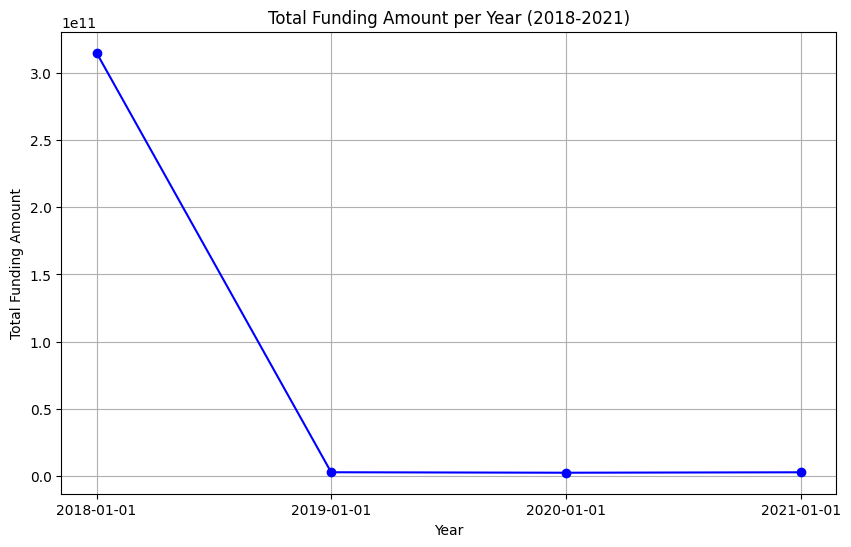

In [71]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_funding['Year'], filtered_funding['Amount'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Total Funding Amount per Year (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.xticks(filtered_funding['Year'])  # Ensure all years are shown on the x-axis
plt.grid(True)
plt.show()

In [57]:
# HoW has the average funding amount in each Sector changed over the years 

# The data to include years 2018 to 2021
Year = df_combined['Year']

# Group the data by 'Sector' and 'Year', and calculate the mean 'Amount'
average_funding = df_combined.groupby(['Sector', 'Year'])['Amount'].mean().reset_index()

# Sort the DataFrame in descending order based on 'Amount'
average_funding = average_funding.sort_values('Amount', ascending=False)

average_funding

,Sector,Year,Amount
451,Finance,2018-01-01,2.944206e+09
694,Innovation Management,2007-01-01,1.000000e+09
495,"Food Delivery, Food Processing, Internet",2018-01-01,1.000000e+09
893,Sports,2008-01-01,8.400000e+08
519,Food delivery,2014-01-01,8.000000e+08
...,...,...,...
109,"B2B, Biometrics, Cyber Security, Fraud Detecti...",2018-01-01,1.000000e+04
507,"Food and Beverage, Food Delivery, Internet",2018-01-01,7.500000e+03
719,"Internet of Things, Waste Management",2018-01-01,6.500000e+03
387,"Education, Information Technology, Internet, M...",2018-01-01,1.300000e+03


In [58]:
# Select the top 10 sectors
top_5_sectors = average_funding.groupby('Sector')['Amount'].mean().sort_values(ascending=False).head(5).reset_index()

# Filter the data for the top 10 sectors
filtered_data = average_funding[average_funding['Sector'].isin(top_5_sectors['Sector'])]

# Create the line plot
fig = px.line(filtered_data, x='Year', y='Amount', color='Sector', title='Average Funding Amount by Sector and Year (Top 5 Sectors)')

# Customize the plot
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Funding Amount',
    legend_title='Sector',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(size=14)
)

# Rotate the x-axis tick labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

**2. Sector Analysis: Which sectors have received the most funding, and how does the funding distribution vary across sectors?**

In [59]:
# Calculate total funding amount for each sector
total_funding_by_sector = df_combined.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sectors by total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values('Amount', ascending=False)

# Print the top sectors by total funding amount
print("Top Sectors by Total Funding Amount:")
print(total_funding_by_sector.head(10))

# Visualize the funding distribution across sectors
fig = px.bar(total_funding_by_sector.head(10), x='Sector', y='Amount',
             title='Top Sectors by Total Funding Amount',
             labels={'Sector': 'Sector', 'Amount': 'Total Funding Amount'})

# Rotate the x-axis tick labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

Top Sectors by Total Funding Amount:
                    Sector        Amount
293                Finance  3.085703e+11
551              Transport  6.986306e+09
248                 EdTech  3.998460e+09
294     Financial Services  3.259532e+09
241             E-commerce  2.958890e+09
385            Hospitality  2.536665e+09
406  Innovation Management  2.000000e+09
532                 Sports  1.690585e+09
332          Food delivery  1.600000e+09
408              Insurance  1.452300e+09


**3. Stage Analysis: What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?**

In [60]:
# Calculate total funding amount for each investment stage
total_funding_by_stage = df_combined.groupby('Stage')['Amount'].sum().reset_index()

# Sort the investment stages by total funding amount in descending order
total_funding_by_stage = total_funding_by_stage.sort_values('Amount', ascending=False)

# Print the investment stages by total funding amount
print("Investment Stages by Total Funding Amount:")
print(total_funding_by_stage)

# Select the top 10 stages
top_10_stages = total_funding_by_stage.head(10)

# Visualize the funding distribution across the top 10 investment stages
fig = px.bar(top_10_stages, x='Stage', y='Amount',
             title='Funding Distribution across Top 10 Investment Stages',
             labels={'Stage': 'Investment Stage', 'Amount': 'Total Funding Amount'})

# Rotate the x-axis tick labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

Investment Stages by Total Funding Amount:
                       Stage        Amount
1             Debt Financing  1.515386e+11
15                 Series D1  1.508586e+11
13                  Series C  8.028326e+09
16                  Series E  7.406276e+09
9                   Series A  6.503848e+09
11                  Series B  6.473998e+09
14                  Series D  5.785530e+09
19                  Series H  5.064200e+09
17                  Series F  4.605132e+09
5             Private Equity  3.339035e+09
6                       Seed  3.295586e+09
8                 Seed Round  2.179940e+09
20                  Series I  2.160859e+09
0                     Bridge  2.137671e+09
18                  Series G  1.873541e+09
3              Fresh Funding  1.631805e+09
12                 Series B+  1.609560e+09
21  Venture - Series Unknown  1.601383e+09
7               Seed Funding  1.546070e+09
4                   Pre-Seed  1.432641e+09
10                 Series A+  1.147475e+09
2          

**4. Geographical Analysis: Which cities or regions (HeadQuarter) have the highest concentration of funded startups?**

In [61]:
# Calculate total funding amount for each HeadQuarter
total_funding_by_hq = df_combined.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Sort the HeadQuarter locations by total funding amount in descending order
total_funding_by_hq = total_funding_by_hq.sort_values('Amount', ascending=False)

# Print the top 10 HeadQuarter locations by total funding amount
print("Top 10 HeadQuarter Locations by Total Funding Amount:")
print(total_funding_by_hq.head(10))

# Visualize the funding distribution across HeadQuarter locations
fig = px.bar(total_funding_by_hq.head(10), x='HeadQuarter', y='Amount',
             title='Top 10 HeadQuarter Locations by Total Funding Amount',
             labels={'HeadQuarter': 'HeadQuarter Location', 'Amount': 'Total Funding Amount'})

# Rotate the x-axis tick labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

Top 10 HeadQuarter Locations by Total Funding Amount:
                HeadQuarter        Amount
70                   Mumbai  3.107163e+11
14                Bengaluru  3.497344e+10
39                 Gurugram  9.674770e+09
73                New Delhi  4.745166e+09
21                  Chennai  1.666970e+09
83                     Pune  1.131025e+09
75                    Noida  8.854700e+08
48                   Jaipur  8.435950e+08
38  Gurgaon, Haryana, India  6.068879e+08
43                Hyderabad  5.511632e+08


**5. Investor Influence: Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?**

In [62]:
# Calculate total funding amount for each investor
total_funding_by_investor = df_combined.groupby('Investor')['Amount'].sum().reset_index()

# Sort the investors by total funding amount in descending order
total_funding_by_investor = total_funding_by_investor.sort_values('Amount', ascending=False)

# Print the top 10 investors by total funding amount
print("Top 10 Investors in Indian Startup Ecosystem:")
print(total_funding_by_investor.head(10))

# Visualize the funding distribution across top investors
fig = px.bar(total_funding_by_investor.head(10), x='Investor', y='Amount',
             title='Top 10 Investors in Indian Startup Ecosystem',
             labels={'Investor': 'Investor', 'Amount': 'Total Funding Amount'})

# Rotate the x-axis tick labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

Top 10 Investors in Indian Startup Ecosystem:
                                              Investor        Amount
875                             Unicorn India Ventures  1.513084e+11
260                                  Elevation Capital  1.506316e+11
830                                       Tiger Global  3.424000e+09
193  Canaan Valley Capital, Glade Brook Capital Par...  2.000000e+09
282  Falcon Edge, DST Global, D1 Capital, Redbird C...  1.680000e+09
199                     Carmignac, Falcon Edge Capital  1.600000e+09
754                               Sixth Sense Ventures  1.350358e+09
766      SoftBank Vision Fund, Hindustan Media Venture  1.320000e+09
857                                          TradeCred  1.230000e+09
285                                Fidelity, B Capital  1.140000e+09


**6. Founder Impact: Is there a correlation between the number of founders and the amount of funding received?**

In [98]:
# Calculate total funding amount for each founder
total_funding_by_founder = df_combined.groupby('Founders')['Amount'].sum().reset_index()

# Sort the founders by total funding amount in descending order
total_funding_by_founder = total_funding_by_founder.sort_values('Amount', ascending=False)

# Select the top 10 founders
top_10_founders = total_funding_by_founder.head(10)

# Plot the data
fig = px.scatter(top_10_founders, x='Founders', y='Amount',
                 title='Top 10 Founders by Total Funding Amount',
                 labels={'Founders': 'Number of Founders', 'Amount': 'Total Funding Amount'})

# Show the plot
fig.show()

**7. What are the characteristics of startups in the highest-funded sectors (e.g., number of founders, location)?**

In [91]:
# Find the highest-funded sectors
highest_funded_sector = df_combined['Sector'].value_counts().idxmax()

# Filter the dataset to include only startups in the highest-funded sector
highest_funded_startups = df_combined[df_combined['Sector'] == highest_funded_sector]

# Analyze the characteristics of startups in the highest-funded sector
num_founders = highest_funded_startups['Founders'].apply(lambda x: len(str(x).split(',')))
locations = highest_funded_startups['HeadQuarter']

# Convert float values to strings
locations_str = locations.apply(lambda x: str(x) if isinstance(x, float) else x)

# Clean up locations
cleaned_locations = locations_str.str.strip().str.capitalize().unique()

# Print the characteristics
print(f"Average number of founders in the {highest_funded_sector} sector: {num_founders.mean()}")
print(f"Cleaned locations of startups in the {highest_funded_sector} sector: {', '.join(cleaned_locations)}")

Average number of founders in the Finance sector: 1.7564469914040115
Cleaned locations of startups in the Finance sector: Chennai, Delhi, Bengaluru, Nan, Noida, Rajasthan, Gurugram, New delhi, Gujarat, Mumbai, Pune, Thane, Hyderabad, Bhubaneswar, Jaipur, Santra, Chandigarh, Gurgaon, haryana, india, Bengaluru, karnataka, india, Kormangala, karnataka, india, Andheri, maharashtra, india, Ahmedabad, gujarat, india, Haryana


**8. Which Business is more viable to set - The best performing business(s) ? The determinants for our best performing will be determined from the sector that recieved the highest funding Amount and not in debt and exsists in the Stage: Series D onwads.**

In [65]:
# Filter out companies that are in debt
not_in_debt = df_combined[df_combined['Stage'] != 'Debt']

# Filter out companies that are in Series D or later stages
series_d_or_later = not_in_debt[not_in_debt['Stage'].isin(['Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I'])]

# Calculate total funding amount for each sector
total_funding_by_sector = series_d_or_later.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sector by total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values('Amount', ascending=False)

# Select the top company (or companies) with the highest funding amount
top_funded_sector = total_funding_by_sector.head()

# Print the top funded sector 
print("Best Performing Sector:")
for _, row in top_funded_sector.iterrows():
    print(f"Sector: {row['Sector']}")
    print(f"Total Funding Amount: {row['Amount']}")
    print("---")

Best Performing Sector:
Sector: Transport
Total Funding Amount: 4014334800.0
---
Sector: Finance
Total Funding Amount: 3749116000.0
---
Sector: Innovation Management
Total Funding Amount: 2000000000.0
---
Sector: EdTech
Total Funding Amount: 1680120000.0
---
Sector: Sports
Total Funding Amount: 1680000000.0
---


In [66]:
# Load the csv into a dataframe

df_combined.to_csv('clean_combined_LP1dataset.csv', index= False)